**Nom et prénoms du binôme : MONNOT Clément / ZUO You**

**ENSIIE**

**Date : 24/5/2020**

 <font size=5><center size=10> TP Séparateurs à Vaste Marge – « SVM» <center/><font/>
    
<center>-  J. Boudy - TSP –<center/>

<font size = 3.5><center>Version sous Python<center/><font/>


## Partie I : Les Séparateurs à Vaste Marge et Méthodes de Fusion – questions théoriques (partie TD)

### 1) Quel est le titre correspondant en anglais de l’approche de classification « Séparateurs à Vaste Marge » ? Pourquoi ? Rappeler en quelques lignes le principe de cette approche ? 

Le titre anglais est « Support vector machines ». 

Les vecteurs supports désignent les points les plus proches de l’hyperplan optimal car leurs vecteurs parallèles à l’hyperplan optimal délimitent la marge optimale autour de l’hyperplan optimal. 

Le but de cette méthode est d’avoir un hyperplan qui maximise sa distance par rapport aux points les plus proches de chaque classe. 

De plus, si aucune solution linéaire n’est possible, cette approche peut aussi transformer l’espace de représentation des données pour passer dans une dimension plus élevée et d’obtenir une séparation linéaire.

### 2) Qu’est-ce que le passage du Problème d’Optimisation Primal au Problème Dual ? expliciter par quelques équations (écrites à la main et scannées pour inclusion dans ce compte-rendu électronique).

Le problème primal consiste à minimiser:
$$\left\{\begin{array}{l}
\min \frac{1}{2}\|w\|^2\\ 
i=1,\ldots,L,\quad y_i(w\cdot X_i+b)\geq 1
\end{array}\right.$$

On optimise le problème primal en problème dual pour permettre une réduction du nombre de variables en faisant d’abord une transformation du problème primal sous contrainte de Lagrange :
$$Lp(w,b,\alpha)=\frac{1}{2}\|w\|^2-\sum_i \alpha_i[Y_i(w \cdot X_i+b)-1]$$
où $\alpha_i\geq0$.

Puis on va chercher un minorant, noté $Ld$, du critère de Lagrange $Lp$ : 

$$max⁡{\{Ld(α)\}}≤min⁡{\{Lp(w,b,α)\}}$$

On peut alors transformer le problème en se passant des deux variables $w$ et $b$ optimales et maximiser selon $\alpha \gt 0$:
$$\left\{\begin{array}{l}
w^*=\sum_{i=1}^n\alpha_i^*y_ix_i\\ 
\sum_{i=1}^n \alpha_iy_i=0
\end{array}\right.$$

donc on obtient la formulation du critère dual suivante :

$$\left\{\begin{array}{l}
\max \sum_{i=1}^n \alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i \alpha_jy_iy_jx_i\cdot x_j\\ 
\forall i,\alpha_i \gt 0\\
\sum_{i=1}^n \alpha_i y_i = 0
\end{array}\right.$$

### 3) Rappeler les 3 principales fonctions noyaux (Kernel), en donnant leurs relations mathématiques, utilisées avec les SVM. Quel critère doit vérifier une fonction noyau ? Que se passe-t-il respectivement pour un noyau polynomial d’ordre 1 et un noyau de type sigmoïde ? à quels algorithmes connus de classification peut-on les rattacher ? Donner la relation de la fonction de décision utilisée par l’algorithme des SVM faisant alors intervenir la fonction noyau dans le cas général ? 


Les trois principales fonctions noyaux:
1. Noyau linéaire :        $\mathcal{K}(x,x')=x\cdot x'$
2. Noyau Polynomial : $\mathcal{K}(x,x')=(c+x\cdot x')^d$
3. Noyau Gaussien ou RBF : $\mathcal{K}(x,x')=e^{-\frac{\|x-x'\|^2}{\sigma}}$

Une fonction noyau doit être continue et symétrique et elle vérifie la condition de Mercer (existence d'un developpement en série de convergence absolue, uniforme et semi-définie positive). La fonction noyau est le produit scalaire de deux applications:
$$\mathcal{K}(x,x')=\Phi(x)\cdot \Phi(x') $$

Pour un noyau polynomial, quand son ordre est égal à 1, il devient un noyau linéaire. Et pour un noyau type sigmoïde ayant la formule $\mathcal{K}(x,x')=tanh(\gamma x\cdot x'+c)$, c'est équivalent à un réseau de neurones sans couches cachées.

La fonction de décision est la suivante :
$$f(x)=\sum_{i=1}^n \alpha_i^*y_i \Phi(x_i)\cdot \Phi(x)+b $$

### 4) Quel est l’intérêt de la méthode de Fusion de données fondée sur la théorie de Dempster-Shafer (Belief Theory), notamment par rapport à d’autres approches de fusion ? rappeler en quelques lignes les principales définitions mathématiques et la relation fondamentale la caractérisant ?

1. Approche de fusion fondée sur des Règles-d'experts qui n'a pas besoin du processus d'apprentissage de modèles.
2. Combiner les concepts de la logique floue avec le formalisme probabiliste.
3. Permettre de traiter **le degré d'incertitude et l’hétérogénéité des données** acquises avec **plusieurs capteurs/modalités hétérogènes** .
4. Approche pouvant répondre au problème de rareté d’exemples de situations réelles à détecter nécessaires à une modélisation statistique.

Soit un espace de discernement:
$$\Theta=\{A,B\}$$

Où A et B sont des états qui peuvent être observés, on a alors son Power Set:
$$P(\Theta)=\{\phi,\{A\},\{B\},\Theta\}$$

Selon la critère de BPA (Basic Probability Assignment) ou de BBA (Basic Belief Assignment), on obtient la fonction de masse suivante :
$$m(A): Croyance\ en\ A$$
en satisfaisant les conditions:
$$\begin{array}{l}
m(\phi)=0\\ 
\sum_{A \in \Theta}=1
\end{array}$$

Pour chaque élément $A$ dans l'espace $\Phi$, on a:
$$\begin{array}{l}
Croyance:\quad &Bel(A)=\sum_{B|B\subseteq A }m(B)\\ 
Plausibilité:&Pl(A)=\sum_{B|B\cap A\neq0}m(B)\\
Intervalle\ de\ croyance:&Bel(A)\leq \mathcal{I}(A) \leq Pl(A)
\end{array}$$

On a des masse associées à $ns$ classifieurs ou experts:
$$m=[m_1,\ldots,m_{ns}]$$

la fusion des masses des $ns$ classifieurs sera:
$$m_1(A)\oplus\ldots \oplus m_{ns}(A)=\frac{\sum_{B\cap\ldots \cap C=A}m_1(B)\ldots m_{ns}(C)}{1-K}$$

où $K=\sum_{B\cap\ldots \cap C=\phi}m_1(B)\ldots m_{ns}(C)$ est le coefficient de conflit, et $0\leq  K \leq 1$.

### 5) Un jeu de 20 articles (théoriques ou applicatifs) est joint à cet énoncé. En choisir un et résumer la problématique posée par les auteurs et les solutions qui y sont proposées (en maxi 15 lignes de traitement de texte Word).

Article : Fusion de données Télévigilance-REE2014

  Dans le cadre de la télévigilance médicale pour la surveillance des chutes chez les personnes dépendantes qui sont principalement des personnes âgées, les dispositifs existants possèdent un déploiement spécifique et récoltent donc des données homogènes. L’article présente un déploiement de plusieurs dispositifs qui récoltent des types différents de données ce qui amène le problème de l’analyse de ces données hétérogènes pour détecter une chute (la sensibilité) et éviter le plus possible les fausses alertes (la spécificité) ou les suspicions d’une chute.
  
  Pour pallier à ce problème de données hétérogènes, l’article propose la 
fusion de ces données à plusieurs moments lors de la chaîne de récolte et d’analyse de ces données. La fusion de ces données peut se faire à l’aide de la logique floue ou de la théorie des croyances de Dempster et Shafer appliquée sur des réseaux d’évidence. Une tentative fut faite avec la fusion des scores mais à cause de la grande diversité des types de données, cette approche fut peu convaincante comparée à celles mentionnées plus tôt.




## Partie II : Simulation d’un SVM et d’une Fusion de données fondée sur la théorie de Dempster-Shafer (partie TP)

### 6)	De quel type sont les données à traiter ? A quoi correspondent les différentes colonnes ? Quels paramètres différentient les données normales de celles anormales (situations de détresses). Pour ce faire consulter les fichiers de données  *Donnees_Televigilance_09-10-08.txt* ou *bradydora_09-10-08_labels_modifié.txt* 

```
Exemple de données extraites du fichier en question :
0 07-06-2006 11:04:18 0 0 0 0 15 042
0 07-06-2006 11:04:48 0 0 0 0 15 041
0 07-06-2006 11:05:00 0 0 0 0 15 061
0 07-06-2006 11:05:30 0 0 0 0 15 082

0 07-06-2006 14:30:00 0 0 1 0 15 028
0 07-06-2006 14:30:30 0 0 1 0 10 039
0 07-06-2006 14:31:00 0 0 1 0 00 039
0 07-06-2006 14:31:30 0 0 1 0 00 036
```

Les données à traiter sont des données continues pour la plus part et certaines sont discrètes. La 2ème et 3ème colonne correspondent à la dte et l'heure, la 6ème correspond à la position horizontale ou verticale de la personne et enfin la dernière colonne correspond au rythme cardiaque de cette personne.

La position de la personne et le rythme cardiaque sont des paramètres importants pour déterminer si une situation de détresse a lieu. Un ryhtme cardiaque inférieur à 40 et une position à 1 (horizontale).

### 7)	Implémenter le programme de SVM provenant de la librairie ScikitLearn (sous Python) dans votre environnement Anaconda dont des éléments de programmation sont donnés en Annexe 1 avec trois jeux de données de Télévigilance.  Exécuter le programme pour les différents types de noyaux (linéaire, gaussien et polynomial). Que remarquer en commentant les résultats 

In [1]:
"""
Created on Mon May 11 16:10:58 2020
@author: boudy
"""
from pylab import *
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt


linear_svc = svm.SVC(kernel='linear')
rbf_svc = svm.SVC(kernel='rbf')
polynomial_svc = svm.SVC(kernel='poly')

In [2]:
# Tests préliminaires de prise en main des commandes principales pour exécuter une prédiction par l’algorithme SVM sous Python :
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

Val_pred1=clf.predict([[2., 2.]])
Val_pred2=clf.predict([[2., 0.]])
Val_pred3=clf.predict([[0., 0.]])
print(Val_pred1,Val_pred2,Val_pred3)

[1] [1] [0]


In [3]:
########### Données d'Apprentissage et de Test indépendantes pour le SVM ##########

In [4]:
#------- Jeu de données n°1 --------
#--- Apprentissage à partir de 8 exemples de dimension N=2 Feature X=(Mvt,Pouls)
X1 = [[15, 42], [15, 41], [14, 61], [3, 70], [0, 58], [15, 37], [4, 38], [2, 42]]
y1 = [0, 0, 0, 0, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels1 = [0, 1, 1, 1, 0]
#X_test1=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 41]]
X_test1=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 36]]

#------- Jeu de données n°2 --------
#--- Apprentissage à partir de 16 exemples de dimension N=2 Feature X=(Mvt,Pouls)
X2 = [[15, 42], [15, 41], [14, 61], [3, 70], [13, 40], [14, 43], [11, 65], [3, 70], [0, 58], [15, 37], [4, 38], [2, 42], [2, 59], [13, 33], [5, 38], [0, 35]]
y2 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels2 = [0, 0, 1, 1, 1, 1, 0, 0]
X_test2=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 36], [14, 39], [3, 80], [3, 60]]

#------- Jeu de données n°3 --------
#--- Apprentissage à partir de 16 exemples de dimension N=3 Feature X=(Mvt,Pouls, SpO2)
X3 = [[15, 56, 92], [15, 58, 93], [14, 61, 90], [3, 70, 89], [13, 41, 86], [14, 70, 91], [11, 65, 92], [3, 70, 90], [0, 58, 85], [15, 37, 80], [4, 38, 75], [2, 42, 84], [2, 40, 85], [13, 33, 74], [5, 38, 84], [0, 35, 80]]
y3 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels3 = [0, 0, 1, 1, 1, 1, 0, 0]
X_test3=[[15., 60., 90.], [2., 42., 89.], [4., 39., 75.], [2., 35., 80.], [15., 36., 82.], [14., 39., 79.], [3., 80., 91.], [3., 60.,93.]]

#### données n°1

[[15. 41.]
 [ 0. 58.]
 [15. 37.]]
[1 4 5]
[1 2]


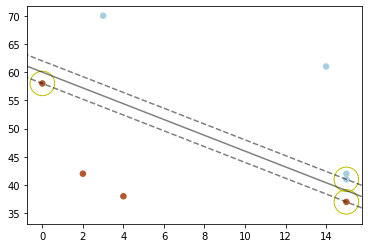

In [5]:
####################################
# Noyau Linéaire
# ------ Apprentissage ------
clf = svm.SVC(kernel='linear')
clf.fit(X1, y1)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

plt.scatter([x10[0] for x10 in X1],[x11[1] for x11 in X1],c=y1,s=30,cmap=plt.cm.Paired)
#plot hyperplane
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY=np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(),YY.ravel()]).T 
Z=clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z, colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--']) 
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=600,linewidth=1,facecolors='none',edgecolors='y')
plt.show()

In [6]:
# ------ Test ------
Val_pred_lin=clf.predict(X_test1)

delta_Lab=Val_pred_lin-Lab_reels1
print('Erreurs Kernel Linéaire :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_LinKern=Nb_erreurs/size(Lab_reels1)
Taux_Reco=(1-Taux_erreurs_LinKern)*100
print('Taux_Reco Noyau Linéaire en % :',Taux_Reco)

Erreurs Kernel Linéaire : [0 0 0 0 1]
Taux_Reco Noyau Linéaire en % : 80.0


[[15. 42.]
 [15. 41.]
 [14. 61.]
 [ 3. 70.]
 [ 0. 58.]
 [15. 37.]
 [ 4. 38.]
 [ 2. 42.]]
[0 1 2 3 4 5 6 7]
[4 4]


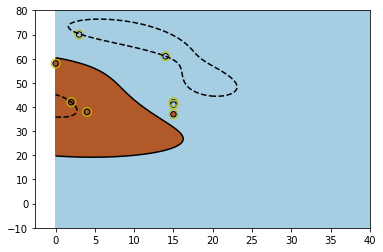

In [7]:
################################
# Noyau RBF (Gaussien)
# ------ Apprentissage ------
clf = svm.SVC(kernel='rbf',gamma=0.005)
#<à compléter>
clf.fit(X1, y1)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

XX,YY=np.meshgrid(np.linspace(0,40,500),np.linspace(-10,80,500))
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX,YY,Z,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--'])
plt.scatter([x10[0] for x10 in X1],[x11[1] for x11 in X1],c =y1, s=30,cmap=plt.cm.Paired,  edgecolors='k')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=80,facecolors='none', edgecolors='y')
plt.xticks()
plt.yticks()
plt.show()

In [8]:
# ------ Test ------
Val_pred_rbf=clf.predict(X_test1) #<à compléter>


delta_Lab=Val_pred_rbf-Lab_reels1 #<à compléter>
print('Erreurs Kernel RBF :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_RbfKern=Nb_erreurs/size(Lab_reels1)
Taux_Reco=(1-Taux_erreurs_RbfKern)*100
print('Taux_Reco Noyau RBF ou Gaussien en % :',Taux_Reco)

Erreurs Kernel RBF : [0 0 0 0 0]
Taux_Reco Noyau RBF ou Gaussien en % : 100.0


[[15. 42.]
 [15. 41.]
 [ 3. 70.]
 [ 0. 58.]
 [15. 37.]]
[0 1 3 4 5]
[3 2]


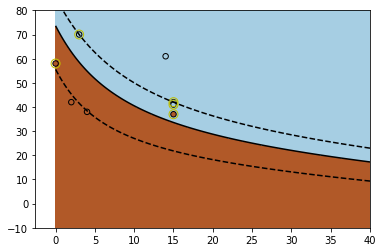

In [9]:
##################################
# Noyau Polynomial (ordre 3 par défaut)
# ------ Apprentissage ------
clf = svm.SVC(kernel='poly')
clf.fit(X1, y1)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

XX,YY=np.meshgrid(np.linspace(0,40,500),np.linspace(-10,80,500))
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX,YY,Z,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--'])
plt.scatter([x10[0] for x10 in X1],[x11[1] for x11 in X1],c =y1, s=30,cmap=plt.cm.Paired,  edgecolors='k')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=80,facecolors='none', edgecolors='y')
plt.xticks()
plt.yticks()
plt.show()

In [10]:
# ------ Test ------
Val_pred_poly=clf.predict(X_test1) #<à compléter>
 
delta_Lab=Val_pred_poly-Lab_reels1
print('Erreurs Kernel Poly :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_PolyKern=Nb_erreurs/size(Lab_reels1)
Taux_Reco=(1-Taux_erreurs_PolyKern)*100
print('Taux_Reco Noyau Polynomial en % :',Taux_Reco)

Erreurs Kernel Poly : [0 0 0 0 0]
Taux_Reco Noyau Polynomial en % : 100.0


D'après les résultats ci-dessus, on peut constater que pour la fonction du noyau linéaire, la fonction du noyau polynomiale d'ordre 3 et la fonction du noyau gaussien, le nombre de vecteurs de support SVM augmente progressivement et la fonction du noyau gaussien utilise toutes les données comme vecteur de support.

En plus, dans les résultats du test, la fonction du noyau polynomial de degré 3 a atteint une précision allant jusqu'à 100%, la fonction du noyau gaussien d'origine (avec la valeur de gamma valant par défaut 0.001) a un taux de précision de 80% et lorsque nous ajustons la valeur de gamma à 0,005, le taux de précision du résultat du test a également atteint 100%. 

Nous répéterons ensuite le processus ci-dessus pour l'ensemble de données 2.

#### données n°2

[[13. 40.]
 [14. 43.]
 [15. 37.]
 [ 2. 59.]
 [13. 33.]]
[ 4  5  9 12 13]
[2 3]


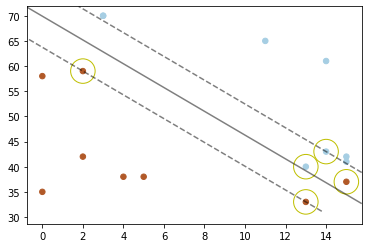

In [11]:
####################################
# Noyau Linéaire
# ------ Apprentissage ------
clf = svm.SVC(kernel='linear')
clf.fit(X2, y2)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

plt.scatter([x20[0] for x20 in X2],[x21[1] for x21 in X2],c=y2,s=30,cmap=plt.cm.Paired)
#plot hyperplane
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY=np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(),YY.ravel()]).T 
Z=clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z, colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--']) 
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=600,linewidth=1,facecolors='none',edgecolors='y')
plt.show()

In [12]:
# ------ Test ------
Val_pred_lin=clf.predict(X_test2)

delta_Lab=Val_pred_lin-Lab_reels2
print('Erreurs Kernel Linéaire :',delta_Lab) 
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_LinKern=Nb_erreurs/size(Lab_reels2)
Taux_Reco=(1-Taux_erreurs_LinKern)*100
print('Taux_Reco Noyau Linéaire en % :',Taux_Reco)

Erreurs Kernel Linéaire : [ 0  1  0  0 -1 -1  0  1]
Taux_Reco Noyau Linéaire en % : 50.0


[[15. 42.]
 [15. 41.]
 [14. 61.]
 [ 3. 70.]
 [13. 40.]
 [14. 43.]
 [ 3. 70.]
 [ 0. 58.]
 [15. 37.]
 [ 4. 38.]
 [ 2. 42.]
 [ 2. 59.]
 [13. 33.]
 [ 5. 38.]]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14]
[7 7]


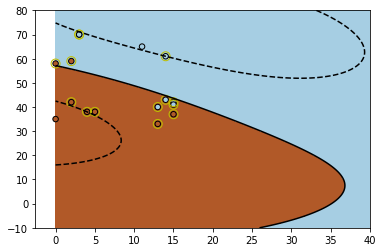

In [13]:
################################
# Noyau RBF (Gaussien)
# ------ Apprentissage ------
clf = svm.SVC(kernel='rbf')
#<à compléter>
clf.fit(X2, y2)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

XX,YY=np.meshgrid(np.linspace(0,40,500),np.linspace(-10,80,500))
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX,YY,Z,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--'])
plt.scatter([x20[0] for x20 in X2],[x21[1] for x21 in X2],c =y2, s=30,cmap=plt.cm.Paired,  edgecolors='k')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=80,facecolors='none', edgecolors='y')
plt.xticks()
plt.yticks()
plt.show()

In [14]:
# ------ Test ------
Val_pred_rbf=clf.predict(X_test2) #<à compléter>


delta_Lab=Val_pred_rbf-Lab_reels2 #<à compléter>
print('Erreurs Kernel RBF :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_RbfKern=Nb_erreurs/size(Lab_reels2)
Taux_Reco=(1-Taux_erreurs_RbfKern)*100
print('Taux_Reco Noyau RBF ou Gaussien en % :',Taux_Reco)

Erreurs Kernel RBF : [0 1 0 0 0 0 0 0]
Taux_Reco Noyau RBF ou Gaussien en % : 87.5


[[15. 42.]
 [15. 41.]
 [ 3. 70.]
 [13. 40.]
 [14. 43.]
 [ 3. 70.]
 [ 0. 58.]
 [15. 37.]
 [ 2. 59.]
 [13. 33.]
 [ 5. 38.]]
[ 0  1  3  4  5  7  8  9 12 13 14]
[6 5]


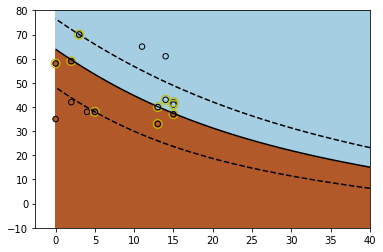

In [15]:
##################################
# Noyau Polynomial (ordre 3 par défaut)
# ------ Apprentissage ------
clf = svm.SVC(kernel='poly',degree=2)
clf.fit(X2, y2)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

XX,YY=np.meshgrid(np.linspace(0,40,500),np.linspace(-10,80,500))
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX,YY,Z,colors=['k','k','k'],levels=[-1,0,1],linestyles=['--','-','--'])
plt.scatter([x20[0] for x20 in X2],[x21[1] for x21 in X2],c =y2, s=30,cmap=plt.cm.Paired,  edgecolors='k')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=80,facecolors='none', edgecolors='y')
plt.xticks()
plt.yticks()
plt.show()

In [16]:
# ------ Test ------
Val_pred_poly=clf.predict(X_test2) #<à compléter>
 
delta_Lab=Val_pred_poly-Lab_reels2
print('Erreurs Kernel Poly :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_PolyKern=Nb_erreurs/size(Lab_reels2)
Taux_Reco=(1-Taux_erreurs_PolyKern)*100
print('Taux_Reco Noyau Polynomial en % :',Taux_Reco)

Erreurs Kernel Poly : [ 0  1  0  0  0 -1  0  0]
Taux_Reco Noyau Polynomial en % : 75.0


Le résultat de la première image montre que l'effet de classification du noyau linéaire n'est pas très satisfaisant. La distance entre certains points des deux catégories est trop petite, ce qui rend difficile la bonne séparation avec des lignes droites. 

Ensuite, nous avons également utilisé la fonction du noyau gaussien et la fonction du noyau polynomial pour établir le modèle de SVM. Nous avons constaté que cette fois le noyau gaussien a obtenu le meilleur résultat qui est de 87.5% pour le taux de reconnaissance puis pour la fonction polynomial de degré 2, nous avons également obtenu un résultat assez satisfaisant de 75%.

#### données n°3

De la même manière, nous avons également construit les modèles pour les données trois, mais en raison des limites du dessin tridimensionnel, nous ne montrons que les résultats numériques ici:

In [17]:
####################################
# Noyau Linéaire
# ------ Apprentissage ------
clf = svm.SVC(kernel='linear')
clf.fit(X3, y3)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

# ------ Test ------
Val_pred_lin=clf.predict(X_test3)

delta_Lab=Val_pred_lin-Lab_reels3
print('Erreurs Kernel Linéaire :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_LinKern=Nb_erreurs/size(Lab_reels3)
Taux_Reco=(1-Taux_erreurs_LinKern)*100
print('Taux_Reco Noyau Linéaire en % :',Taux_Reco)

[[13. 41. 86.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 5. 38. 84.]]
[ 4  8  9 14]
[1 3]
Erreurs Kernel Linéaire : [0 0 0 0 0 0 0 0]
Taux_Reco Noyau Linéaire en % : 100.0


In [18]:
################################
# Noyau RBF (Gaussien)
# ------ Apprentissage ------
clf = svm.SVC(kernel='rbf')
#<à compléter>
clf.fit(X3, y3)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

# ------ Test ------
Val_pred_rbf=clf.predict(X_test3) #<à compléter>


delta_Lab=Val_pred_rbf-Lab_reels3 #<à compléter>
print('Erreurs Kernel RBF :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_RbfKern=Nb_erreurs/size(Lab_reels3)
Taux_Reco=(1-Taux_erreurs_RbfKern)*100
print('Taux_Reco Noyau RBF ou Gaussien en % :',Taux_Reco)

[[15. 56. 92.]
 [15. 58. 93.]
 [14. 61. 90.]
 [ 3. 70. 89.]
 [13. 41. 86.]
 [11. 65. 92.]
 [ 3. 70. 90.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 4. 38. 75.]
 [ 2. 42. 84.]
 [ 2. 40. 85.]
 [ 5. 38. 84.]]
[ 0  1  2  3  4  6  7  8  9 10 11 12 14]
[7 6]
Erreurs Kernel RBF : [0 1 0 0 0 0 0 0]
Taux_Reco Noyau RBF ou Gaussien en % : 87.5


In [19]:
##################################
# Noyau Polynomial (ordre 3 par défaut)
# ------ Apprentissage ------
clf = svm.SVC(kernel='poly',degree=4)
clf.fit(X3, y3)

print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)
# ------ Test ------
Val_pred_poly=clf.predict(X_test3) #<à compléter>
 
delta_Lab=Val_pred_poly-Lab_reels3
print('Erreurs Kernel Poly :',delta_Lab)
Nb_erreurs=sum(abs(delta_Lab))
Taux_erreurs_PolyKern=Nb_erreurs/size(Lab_reels3)
Taux_Reco=(1-Taux_erreurs_PolyKern)*100
print('Taux_Reco Noyau Polynomial en % :',Taux_Reco)

[[ 3. 70. 89.]
 [13. 41. 86.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 5. 38. 84.]]
[ 3  4  8  9 14]
[2 3]
Erreurs Kernel Poly : [0 0 0 0 0 0 0 0]
Taux_Reco Noyau Polynomial en % : 100.0


### 8)	Pour effectuer une Fusion de données avec la méthode de Dempster-Shafer, on ajoute une modalité supplémentaire constituée par la mesure du taux de saturation en oxygène dans le sang (SpO2), ceci par exemple grâce à une montre Whitings  (cf. jeu de données n°3 de la question 7).  

Après application des règles de normalité sur la mesure de pouls (Pls) déjà couplée à celle du taux de mouvement ou agitation (Mvt), on désire donc effectuer une fusion avec la mesure de Sp02 à l’aide de la ***Règle de Combinaison de Dempster-Shafer (DS)*** permettant la prise en compte du conflit possible entre modalités à fusionner. 

On supposera les étapes d’affectation de masses (ou croyances) déjà effectuée ainsi que celle de la prise en compte de la fiabilité des mesures délivrées par les capteurs (Discounting process ou ***Reliability Discounting***). On obtient alors pour chaque événement (Chute / Normal ou non-Chute) le jeu de masses suivant :

* {m1(Chute)=0.7,  m1(˥Chute)=0.1, m1(Chute, ˥Chute)=0.2} pour la 1ère modalité composite associée aux mesures de Pls et Mvt converties en masses supposées donc déjà calculées et combinées 

* {m2(Chute)=0.8,  m2(˥Chute)=0.1, m2(Chute, ˥Chute)=0.1} pour la 2ème modalité associée aux mesures de Sp02 convertie en masse (étape de Croyance) supposée déjà effectuée

A l’aide de Python, effectuer un calcul des masses combinées en s’appuyant sur la formule de la **Règle de Combinaison de DS** en calculant au préalable le facteur de conflit K ? Avant de programmer la formule et obtenir les résultats de masses combinées, établir au préalable un tableau de combinaison à la main pour poser soigneusement les étapes de calcul de cette formule (cf. cours).
En déduire alors l’intervalle de Croyance-Plausibilité de chaque événement après Fusion ? Qu’en conclure par rapport aux événements détectés par chacune des deux modalités prises séparément ?

|  | $m_1(Chute)=0.7$ | $m_1(˥Chute)=0.1$ | $m_1(Chute,˥Chute)=0.2$ |
| :-| :- | :- | :-|
| $m_2(Chute)=0.8$ | $m_1\oplus m_2(Chute)=0.56$ | $m_1\oplus m_2(\Phi)=0.08$ | $m_1\oplus m_2(Chute)=0.16$ |
| $m_2(˥Chute)=0.1$ | $m_1\oplus m_2(\Phi)=0.07$ | $m_1\oplus m_2(˥Chute)=0.01$ | $m_1\oplus m_2(˥Chute)=0.02$ |
| $m_2(Chute,˥Chute)=0.1$ | $m_1\oplus m_2(Chute)=0.07$ | $m_1\oplus m_2(˥Chute)=0.01$ | $m_1\oplus m_2(Chute,˥Chute)=0.02$ |

$K = 0.08+0.07 = 0.15$

In [20]:
from pyds import MassFunction

print('=== creating mass functions ===')
m1 = MassFunction([({'chute'}, 0.7), ({'n_chute'}, 0.1), ({'chute','n_chute'}, 0.2)])
print('m_1 =', m1)
m2 = MassFunction([({'chute'}, 0.8), ({'n_chute'}, 0.1), ({'chute','n_chute'}, 0.1)]) # using a list of tuples
print('m_2 =', m2)

=== creating mass functions ===
m_1 = {{'chute'}:0.7; {'chute', 'n_chute'}:0.2; {'n_chute'}:0.1}
m_2 = {{'chute'}:0.8; {'chute', 'n_chute'}:0.1; {'n_chute'}:0.1}


In [21]:
print('\n=== belief, plausibility, and commonality ===')
print('pl_1 =', m1.pl())
print('pl_2 =',m2.pl())
print('bel_1 =', m1.bel()) # entire belief function
print('bel_2 =', m2.bel())
print('Dempster\'s combination rule for m_1 and m_2 =', m1 & m2)


=== belief, plausibility, and commonality ===
pl_1 = {frozenset(): 0.0, frozenset({'chute'}): 0.8999999999999999, frozenset({'n_chute'}): 0.30000000000000004, frozenset({'chute', 'n_chute'}): 1.0}
pl_2 = {frozenset(): 0.0, frozenset({'chute'}): 0.9, frozenset({'n_chute'}): 0.2, frozenset({'chute', 'n_chute'}): 1.0}
bel_1 = {frozenset(): 0.0, frozenset({'chute'}): 0.7, frozenset({'n_chute'}): 0.1, frozenset({'chute', 'n_chute'}): 1.0}
bel_2 = {frozenset(): 0.0, frozenset({'chute'}): 0.8, frozenset({'n_chute'}): 0.1, frozenset({'chute', 'n_chute'}): 1.0}
Dempster's combination rule for m_1 and m_2 = {{'chute'}:0.9294117647058823; {'n_chute'}:0.04705882352941178; {'chute', 'n_chute'}:0.02352941176470589}


Selon le résultat de la combinaison de DS, nous pouvons voir que l'événement «chute» a la valeur de fonction masse la plus élevée (près de 1), nous pouvons donc penser que le résultat de la combinaison de ces deux détecteurs détermine que la «chute» s'est produite.